In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt


def show_hist(x):
    # 1.画布
    plt.figure(figsize=(20, 8), dpi=100)

    # 2.绘制
    plt.hist(x, bins=1000)

    # 3.显示
    plt.show()

Duplicate key in file WindowsPath('c:/python37/venv/ai/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 769 ('font.family:  sans-serif')
Duplicate key in file WindowsPath('c:/python37/venv/ai/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 770 ('font.sans-serif: SimHei')
Duplicate key in file WindowsPath('c:/python37/venv/ai/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 771 ('axes.unicode_minus: False')


# 创建数组

In [3]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

In [4]:
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

# ndarray属性

In [5]:
arr.shape          # 数组维度组成的元组

(2, 4)

In [6]:
arr.ndim           # 数组维数

2

In [7]:
arr.size           # 元素数量

8

In [8]:
arr.itemsize       # 元素所占的字节数

4

In [9]:
arr.dtype          # 元素类型

dtype('int32')

In [10]:
type(arr)          # 数组类型

numpy.ndarray

# 生成均匀分布数组

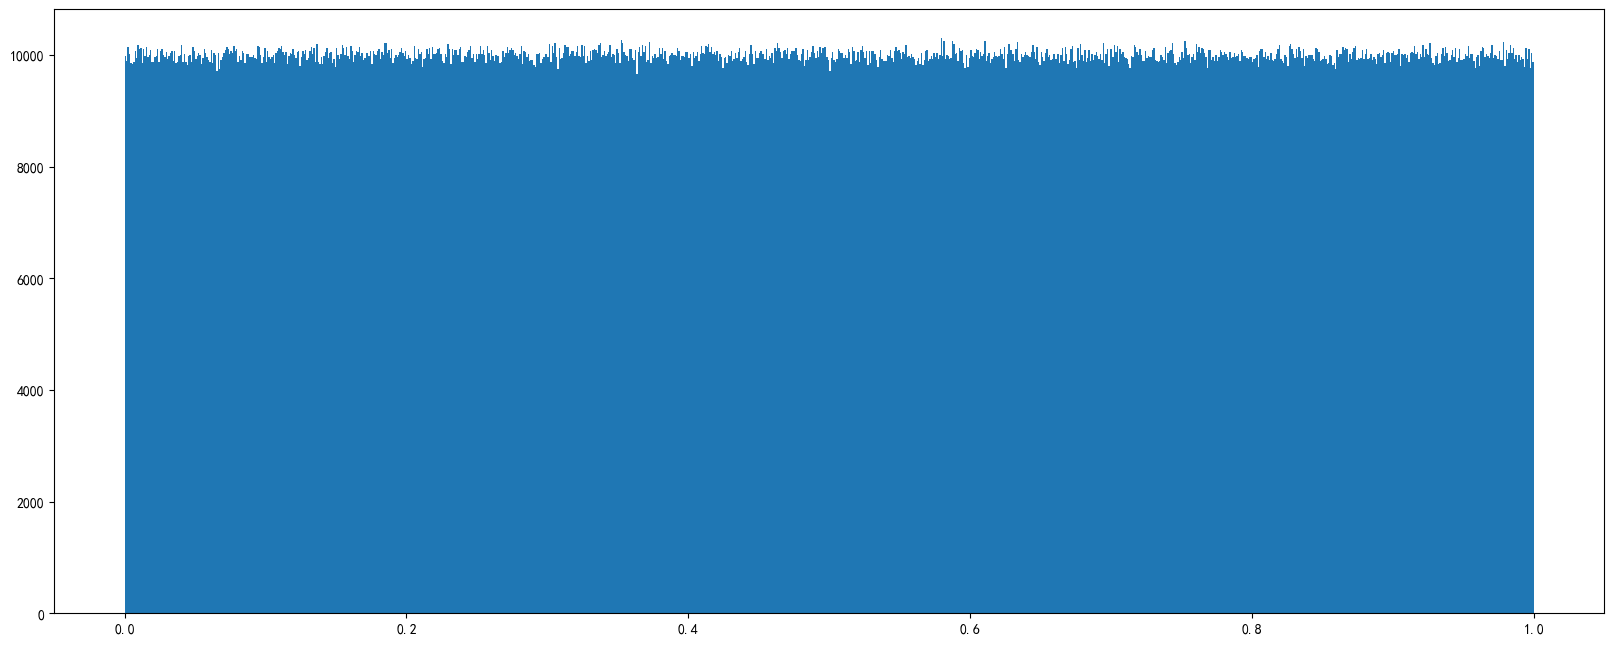

In [11]:
# x = np.random.uniform(0, 1, 10000000)
x = np.random.uniform(low=0, high=1, size=(10000000,))
show_hist(x)

# 生成正态分布数组

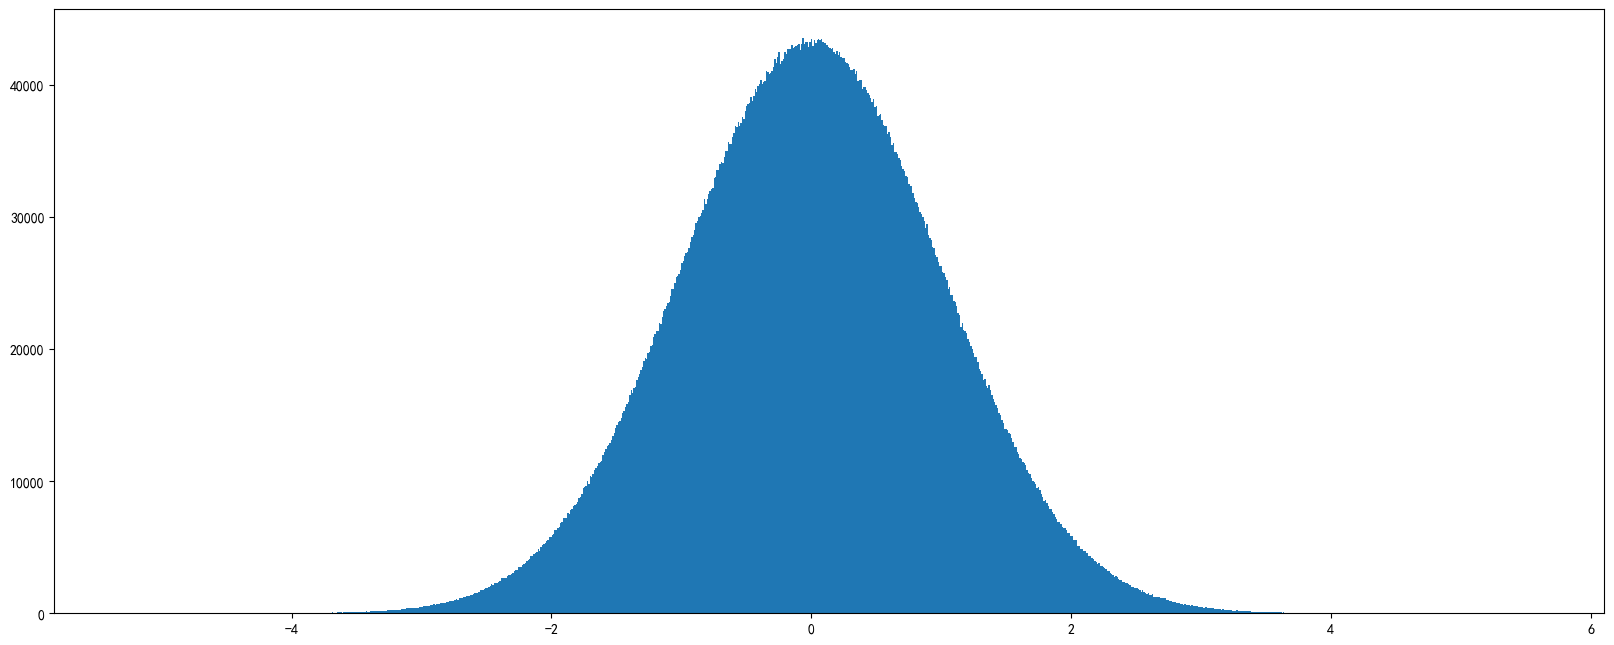

In [12]:
# x = np.random.uniform(0, 1, 10000000)
x = np.random.normal(loc=0.0, scale=1.0, size=(10000000,))  # 标准正态分布:均值为 0，方差为 1
show_hist(x)

# 对比计算效率

In [13]:
# python列表采用分离式存储，可以存储不同类型的元素
a = [i for i in range(1000000)]
%time sum1 = sum(a)

# numpy数组采用连续内存块存储，只能存储相同类型的元素
b = np.array(a)
%time sum2 = np.sum(b)

Wall time: 39 ms
Wall time: 1e+03 µs


# 数组索引、切片

In [14]:
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [15]:
arr[0, 0]     # 索引

1

In [16]:
arr[0:2, 0:2] # 切片

array([[1, 2],
       [5, 6]])

# 改变形状

In [17]:
arr.reshape(4, 2)  # 不会改变 arr 的形状

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [18]:
arr.resize()      # 改变 arr 的形状
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [19]:
arr.T            # 转置

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

# 转换函数

In [20]:
arr.astype(np.float_)  # 转换元素类型，不会修改原数组

array([[1., 2., 3., 4.],
       [5., 6., 7., 8.]])

In [21]:
arr.tobytes()         # 转换为字符串，不会修改原数组

b'\x01\x00\x00\x00\x02\x00\x00\x00\x03\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00\x06\x00\x00\x00\x07\x00\x00\x00\x08\x00\x00\x00'

# 数组去重

In [22]:
a = np.array([[1, 2, 3, 4],
              [1, 2, 5, 6]])
np.unique(a)                       # 不会修改原数组

array([1, 2, 3, 4, 5, 6])

# ndarrary运算

In [23]:
ar = np.random.uniform(0, 10, (3, 3))
ar

array([[3.70768164, 8.61385674, 5.36658322],
       [7.79424555, 5.91559494, 4.29602697],
       [3.70794239, 7.94511875, 8.95164272]])

## 逻辑运算

In [24]:
ar > 1,          # 数组元素比较

(array([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]),)

In [25]:
ar[ar > 1] = 1  # 满足要求的元素，直接赋值
ar

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## 通用判断

In [26]:
(
    np.all(ar > 1),  # 数组所有元素满足条件
    np.any(ar > 1),  # 数组任一元素满足条件
)

(False, False)

## 三元运算符

In [27]:
(
    np.where(ar > 1, 1, 0),
    np.where(np.logical_and(ar > 0.5, ar < 1), 0.5, ar),
    np.where(np.logical_or(ar < 0.5, ar > 1), 0, 1),
)

(array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]),
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]))

## 统计运算

In [28]:
(
    ar.max(),       # 最大值
    ar.min(),       # 最小值
    ar.mean(),      # 平均值
    np.median(ar),  # 中位数
    ar.std(),       # 标准差
    ar.var(),       # 方差 = 标准差 ^ 2
    ar.argmax(),    # 最大值所在下标
    ar.argmin(),    # 最小值所在下标
)

(1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0, 0)

# 数组间的运算

In [29]:
ar = np.arange(9).reshape(3, 3)
ar

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

## 数组与数的运算

In [30]:
(
    ar + 1,
    ar / 3,
)

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[0.        , 0.33333333, 0.66666667],
        [1.        , 1.33333333, 1.66666667],
        [2.        , 2.33333333, 2.66666667]]))

## 数组与数组运算

**广播机制** - 只有满足以下条件之一，两个数组才能进行数组与数组的运算
- sharp(相对的维度相同)
- sharp(相对的维度中，一个维度为1)

**example:**
```
A       (3d array): 256 × 256 × 3
B       (1d array):               3
Result  (3d array): 256 × 256 × 3

A       (4d array): 9 × 1 × 7 × 1
B       (3d array):      8 × 1 × 5
Result  (4d array): 9 × 8 × 7 × 5

A       (3d array): 15 × 3 × 1
B       (3d array): 15 × 1 × 5
Result  (3d array): 15 × 3 × 5

A       (1d array): 10
B       (1d array): 12
Result                                         Error(对应维度不相等，且没有为1的)

A       (2d array):      2 × 1
B       (3d array): 8 × 4 × 3
Result                                         Error(对应维度不相等，且没有为1的)
```

In [31]:
ar1 = np.arange(3).reshape(1, 3)
ar2 = np.arange(6).reshape(2, 3)
ar3 = np.arange(9).reshape(1, 3, 3)

In [32]:
# ar2 + ar3  # 不能运算
ar1 + ar3  # ok

array([[[ 0,  2,  4],
        [ 3,  5,  7],
        [ 6,  8, 10]]])

# 矩阵运算

## 矩阵乘法

 - np.dot - 点乘
 - np.matmul - 矩阵相乘

两者在进行矩阵相乘时，没有区别。
但是, **dot支持矩阵和数字相乘, matmul不支持**

### 验证 dot 和 matmul 相同点

In [33]:
# 学生成绩
scores = np.array([
 #  期中 期末
    [80, 86],
    [82, 80],
    [85, 78],
    [90, 90],
    [86, 82],
    [82, 90],
    [78, 80],
    [92, 94]
])

# 学生成绩占比:    期中30% 期末70%
ratio = np.array([[0.3], [0.7]])

In [34]:
# 计算总成绩
(
    np.matmul(scores, ratio),
    np.dot(scores, ratio)
)

(array([[84.2],
        [80.6],
        [80.1],
        [90. ],
        [83.2],
        [87.6],
        [79.4],
        [93.4]]),
 array([[84.2],
        [80.6],
        [80.1],
        [90. ],
        [83.2],
        [87.6],
        [79.4],
        [93.4]]))

### 验证 dot 和 matmul 区别

In [36]:
a = np.arange(9).reshape(3, 3)
(
    a,
    np.dot(a, 10),
#     np.matmul(a, 10)  # 不支持矩阵和数字的相乘
)

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[ 0, 10, 20],
        [30, 40, 50],
        [60, 70, 80]]))

## 方阵运算

### 求行列式

In [18]:
a = np.arange(1, 5).reshape(2, 2)
(
    a,
    np.linalg.det(a)
)

(array([[1, 2],
        [3, 4]]),
 -2.0000000000000004)

### 求逆矩阵

In [17]:
a = np.arange(1, 5).reshape(2, 2)
(
    a,
    np.linalg.inv(a)
)

(array([[1, 2],
        [3, 4]]),
 array([[-2. ,  1. ],
        [ 1.5, -0.5]]))